# Sprocket Central Pty Ltd Data Set

#### importing necessery libraries for future analysis of the dataset

In [1]:
import numpy as np
import statistics as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas import ExcelWriter
from pandas import ExcelFile

#### Creating data frame

In [2]:
df = pd.read_excel("KPMG.xlsx")

#### creating separate variable for data set

In [3]:
transaction = pd.read_excel("KPMG.xlsx",sheet_name = 1,skiprows = 1)
CustomerDemographic = pd.read_excel("KPMG.xlsx", sheet_name = 3 , skiprows = 1)
CustomerAddress = pd.read_excel("KPMG.xlsx", sheet_name = 4, skiprows = 1)
NewCustomerlist = pd.read_excel("KPMG.xlsx", sheet_name = 2, skiprows = 1)

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### checking transaction data set

In [4]:
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
transaction.shape

(20000, 13)

In [6]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [7]:
transaction.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,1107.829449,556.046951,38199.776549
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,2091.470000,1759.850000,42710.000000
std,5773.647028,30.75359,1011.951046,NaN,0.500013,582.825242,405.955660,2875.201110


In [8]:
transaction.brand.value_counts()

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

#### checking null values in the transaction data frame

In [9]:
transaction.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

#### Checking for Brand Column

In [10]:
transaction.brand.value_counts()

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

#### Dropping brand null value


In [11]:
transaction_1 = transaction[transaction['brand'].isnull()]

In [12]:
transaction.drop(transaction_1.index,inplace = True)

#### Finding mode for order_online 


In [13]:
mode_online_data =  transaction.online_order.mode()[0]
mode_online_data

1.0

#### Replacing the null value with mode_online_data

In [14]:
transaction['online_order'] = transaction['online_order'].fillna(mode_online_data)

#### Checking null value 


In [15]:
transaction.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### lets check CustomerDemographic data frame

In [16]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [17]:
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [18]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [19]:
CustomerDemographic.shape

(4000, 13)

In [20]:
CustomerDemographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


#### Lets Check unique value

In [21]:
CustomerDemographic.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

#### Lets correct the column

In [22]:
CustomerDemographic['gender'] = CustomerDemographic['gender'].map(lambda x : 'Female' if x == 'F' or x == "Femal" else ('Male' if x == 'M' else ( "Unspecified" if x == 'U' else x)))

#### checking the gender column


In [23]:
CustomerDemographic["gender"].value_counts()

gender
Female         2039
Male           1873
Unspecified      88
Name: count, dtype: int64

#### Lets Check the null value

In [24]:
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

#### Lets remove Default from data set 

In [25]:
CustomerDemographic.drop('default',axis = 1,inplace = True)

#### Examining the data set

In [26]:
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

#### Examining  the deceased_indicator column

In [27]:
CustomerDemographic.deceased_indicator.value_counts()

deceased_indicator
N    3998
Y       2
Name: count, dtype: int64

In [28]:
# Create a data frame for deceased customer

In [29]:
Deceased = CustomerDemographic[CustomerDemographic['deceased_indicator']== 'Y']

In [30]:
Deceased.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
752,753,Josy,St. Quentin,Female,82,1970-03-07 00:00:00,Food Chemist,Health,Affluent Customer,Y,Yes,6.0
3789,3790,Kurtis,Morson,Male,91,1959-05-31 00:00:00,Senior Editor,Retail,Mass Customer,Y,Yes,9.0


##### droping the Deceased index


In [31]:
CustomerDemographic.drop(Deceased.index,axis = 0,inplace = True)

#### checking the value count of deceased indicator 

In [32]:
CustomerDemographic['deceased_indicator'].value_counts()

deceased_indicator
N    3998
Name: count, dtype: int64

#### Examining the job_industry_category column


In [33]:
CustomerDemographic.job_industry_category.value_counts()

job_industry_category
Manufacturing         799
Financial Services    774
Health                601
Retail                357
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: count, dtype: int64

#### Correct the Agriculture spelling Mistake

In [34]:
CustomerDemographic['job_industry_category'] = CustomerDemographic['job_industry_category'].replace('Argiculture','Agriculture')

#### Lets check the job_industry_category Column

In [35]:
CustomerDemographic.job_industry_category.value_counts()

job_industry_category
Manufacturing         799
Financial Services    774
Health                601
Retail                357
Property              267
IT                    223
Entertainment         136
Agriculture           113
Telecommunications     72
Name: count, dtype: int64

In [36]:
CustomerDemographic.job_industry_category.value_counts(normalize = True)*100

job_industry_category
Manufacturing         23.907840
Financial Services    23.159785
Health                17.983244
Retail                10.682226
Property               7.989228
IT                     6.672651
Entertainment          4.069420
Agriculture            3.381209
Telecommunications     2.154399
Name: proportion, dtype: float64

#### Here we need to foucus on top for data values
1. Manufacturing         23.907840
2. Financial Services    23.159785
3. Health                17.983244
4. Retail                10.682226

#### So we can fill  the data with these values  

#### Lets check the percentage of null value in job_industry_category

In [37]:
CustomerDemographic.job_industry_category.isnull().mean()*100

16.408204102051023

#### As per value count and percentage of the missing value we can use following method :
1. As the percentage for  Manufacturing  is 23.907840 and is Financial Services  23.159785 
2. So we can fill 246 rows with Manufacturing and other 246 with Financial Services   
3. Remaining 164 we can split the half with Health and Retail

#### Lets create a new data frame for null rows of job_industry_category 

In [38]:
Customer_null =  CustomerDemographic[CustomerDemographic.job_industry_category.isnull()]

#### Lets check the data frame Customer_null

In [39]:
Customer_null.isnull().mean()*100

customer_id                              0.000000
first_name                               0.000000
last_name                                3.810976
gender                                   0.000000
past_3_years_bike_related_purchases      0.000000
DOB                                      0.000000
job_title                               16.006098
job_industry_category                  100.000000
wealth_segment                           0.000000
deceased_indicator                       0.000000
owns_car                                 0.000000
tenure                                   0.000000
dtype: float64

#### Lets  fill the data with our approach

##### Create a list of values to fill



In [40]:
#Top 4 Job Industry Category in terms of frequency:
#job_industry_category
#Manufacturing         799
#Financial Services    774
#Health                601
#Retail                357
#Total Frequency Count = (799+774+601 +357) = 2531
#Total null values present in Job Industry Category = 656
#For Manufacturing: 799/2531 *100  = 31.56%, equivalent to .3156 * 656 = 207
#For Financial Services = 774/2531 *100 = 30.58 %, equivalent to .3058 * 656 = 201
#For Health: 601/2531*100 = 23.74%, equivalent to .2374 * 656 = 156
#For Retail: 656 - (207+201+156) = 92

# Above: Used the mode to impute null values in job industy category field but with slight change, i.e. with the %age frequency of top 4 job industry category

In [41]:
fill_values = ['Manufacturing'] * 207 + ['Financial Services'] * 201 + ['Health'] * 156 + ['Retail'] * 92

##### Fill the null values




In [42]:
Customer_null['job_industry_category'].fillna(value=pd.Series(fill_values, index=Customer_null.index), inplace=True)

##### Verify the count of null values is zero


In [43]:
Customer_null.isnull().sum()

customer_id                              0
first_name                               0
last_name                               25
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              105
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
dtype: int64

#### Lets Drop Customer_null from main data frame


In [44]:
CustomerDemographic = pd.concat([CustomerDemographic, Customer_null], ignore_index=True)

#### Lets Check the shape

In [45]:
CustomerDemographic.shape

(4654, 12)

#### Lets Append the Customer_null in the data frame 

In [46]:
CustomerDemographic = pd.concat([CustomerDemographic, Customer_null], ignore_index=True)

#### Lets Recheck the data frame

In [47]:
CustomerDemographic.shape

(5310, 12)

#### Lets Fill Tenure Column 

##### filling the tenure data set with  median


In [48]:
tenure_median = CustomerDemographic['tenure'].median()

In [49]:
CustomerDemographic['tenure'].fillna(tenure_median,inplace = True)

#### Examine the data set

In [50]:
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              175
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              716
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
dtype: int64

####  Dropping  the null job_title rows

In [51]:
CustomerDemographic['job_title']

0          Executive Secretary
1       Administrative Officer
2           Recruiting Manager
3                          NaN
4                Senior Editor
                 ...          
5305               Geologist I
5306          Technical Writer
5307          Internal Auditor
5308          Graphic Designer
5309      Software Engineer IV
Name: job_title, Length: 5310, dtype: object

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Lets check the CustomerAddress data frame

In [52]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


#### Examine the data set

In [53]:

CustomerAddress.shape

(3999, 6)

In [54]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [55]:
CustomerAddress.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


#### Lets check null values

In [56]:
CustomerAddress.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

#### Lets Check unique values

In [57]:
CustomerAddress['address'].unique()

array(['060 Morning Avenue', '6 Meadow Vale Court', '0 Holy Cross Court',
       ..., '87 Crescent Oaks Alley', '8194 Lien Street',
       '320 Acker Drive'], dtype=object)

In [58]:
CustomerAddress['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

#### Lets replace the values

In [59]:
CustomerAddress['state'].replace('QLD','Queensland',inplace = True)
CustomerAddress['state'].replace('VIC','Victoria',inplace = True)
CustomerAddress['state'].replace('NSW','New South Wales',inplace = True)

#### Lets check the data set

In [60]:
CustomerAddress['state'].unique()

array(['New South Wales', 'Queensland', 'Victoria'], dtype=object)

In [61]:
CustomerAddress['country'].unique()

array(['Australia'], dtype=object)

#### Exporting dataframe to csv file in local system


In [62]:
# Dropping Column: job title
CustomerDemographic.drop('job_title', axis = 1, inplace = True)

In [63]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,NaN,Affluent Customer,N,Yes,8.0


## OUTLIERS

In [64]:
transaction.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date
count,19803.000000,19803.000000,19803.000000,19803,19803.000000,19803.000000,19803.000000,19803.000000
mean,9993.979650,45.815937,1739.294955,2017-07-01 15:40:43.811543552,0.509872,1107.997866,556.046951,38199.776549
min,1.000000,0.000000,1.000000,2017-01-01 00:00:00,0.000000,12.010000,7.210000,33259.000000
25%,4988.500000,18.000000,858.000000,2017-04-01 00:00:00,0.000000,575.270000,215.140000,35667.000000
50%,9995.000000,45.000000,1738.000000,2017-07-03 00:00:00,1.000000,1163.890000,507.580000,38216.000000
75%,15000.500000,72.000000,2615.000000,2017-10-02 00:00:00,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.000000,5034.000000,2017-12-30 00:00:00,1.000000,2091.470000,1759.850000,42710.000000
std,5776.499961,30.569841,1011.946353,NaN,0.499915,582.770460,405.955660,2875.201110


In [65]:
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [66]:
# Creating UDF for treating Outliers

In [67]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1
   upper_fence = q3+1.5*IQR
   lower_fence = q1-1.5*IQR



   outliers = [((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   print(" q1 value:", q1,"\n",\
         "q3:",q3,"\n",
         "IQR :",IQR,"\n",\
         "Lower Fence :",\
         lower_fence,"\n",\
         "upper_fence: ", upper_fence)

In [68]:
# Miscellaneous Analysis:

In [69]:
from datetime import datetime

In [70]:
#converting dates to datetime in pandas
def convert_data_time(num):
    det = datetime.fromordinal(datetime(1900,1,1).toordinal() + num -2 )
    return det

In [71]:
transaction['product_first_sold_date']=transaction['product_first_sold_date'].astype('int').apply(convert_data_time)
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [72]:
# Checking Outliers for list_price field
data = find_outliers_IQR(transaction['list_price'])
data

 q1 value: 575.27 
 q3: 1635.3 
 IQR : 1060.03 
 Lower Fence : -1014.7750000000001 
 upper_fence:  3225.3450000000003


<Axes: xlabel='list_price', ylabel='brand'>

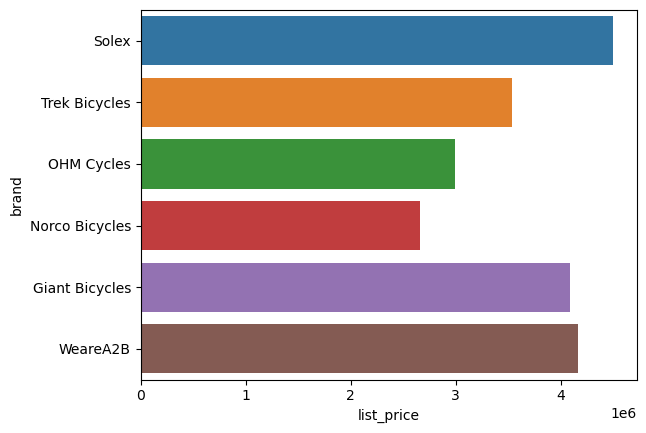

In [73]:
# Visual Check for Outliers in list_price field
sns.barplot(data = transaction, x = 'list_price', y = 'brand',estimator='sum',ci = None)

In [74]:
# Summary Statistic Check over list_price
transaction['list_price'].min()

12.01

In [75]:
print(transaction['list_price'].describe())

count    19803.000000
mean      1107.997866
std        582.770460
min         12.010000
25%        575.270000
50%       1163.890000
75%       1635.300000
max       2091.470000
Name: list_price, dtype: float64


In [76]:
transaction[transaction['list_price'] == 2091.47]['list_price'].value_counts()

list_price
2091.47    465
Name: count, dtype: int64

## standard_cost outliers

In [77]:
# Checking Outliers
data = find_outliers_IQR(transaction['standard_cost'])
data

 q1 value: 215.14 
 q3: 795.1 
 IQR : 579.96 
 Lower Fence : -654.8000000000001 
 upper_fence:  1665.04


In [78]:
# Summary Statistic
transaction['standard_cost'].describe()

count    19803.000000
mean       556.046951
std        405.955660
min          7.210000
25%        215.140000
50%        507.580000
75%        795.100000
max       1759.850000
Name: standard_cost, dtype: float64

In [79]:
# Treating Outliers
transaction['standard_cost'] = transaction['standard_cost'].apply(lambda x : 1665.04 if x >= 1665.04 else  x )

In [80]:
# Chceking summary statistic for Outliers (after treatment):
transaction['standard_cost'].describe()

count    19803.000000
mean       555.113358
std        403.286258
min          7.210000
25%        215.140000
50%        507.580000
75%        795.100000
max       1665.040000
Name: standard_cost, dtype: float64

## Outliers for CustomerDemographic

In [81]:
# Exploring the dataset
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,NaN,Affluent Customer,N,Yes,8.0


In [82]:
# Summary Statistic
CustomerDemographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,5310.000000,5310.000000,5310.000000
mean,2017.304143,48.911299,10.566855
std,1153.551656,28.738437,5.578761
min,1.000000,0.000000,1.000000
25%,1027.250000,23.000000,6.000000
50%,2026.500000,48.000000,10.000000
75%,3015.750000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [83]:
# Checking Outlier
data = find_outliers_IQR(CustomerDemographic['tenure'])
data

 q1 value: 6.0 
 q3: 15.0 
 IQR : 9.0 
 Lower Fence : -7.5 
 upper_fence:  28.5


In [84]:
# Checking Outlier
data = find_outliers_IQR(CustomerDemographic['past_3_years_bike_related_purchases'])
data

 q1 value: 23.0 
 q3: 73.0 
 IQR : 50.0 
 Lower Fence : -52.0 
 upper_fence:  148.0


## Customer address Outliers

In [85]:
# Summary Statistic
CustomerAddress.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [86]:
# Checking Outlier
data = find_outliers_IQR(CustomerAddress['property_valuation'])
data

 q1 value: 6.0 
 q3: 10.0 
 IQR : 4.0 
 Lower Fence : 0.0 
 upper_fence:  16.0


##  Adding Profit Column in Transaction Dataframe 

In [87]:
# Exploring dataset
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [88]:
# Finding Profit
Profit =transaction['list_price'] - transaction['standard_cost']
Profit

0          17.87
1        1702.55
2        1544.61
3         817.36
4        1055.82
          ...   
19995     802.26
19996     104.24
19997    1592.19
19998      91.15
19999     195.34
Length: 19803, dtype: float64

In [89]:
# Adding Profit inside dataframe: transaction
transaction.insert(13,'Profit',Profit,True)

In [90]:
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82


## Adding Age Field in Customer Demographic Dataframe

In [91]:
# Exploring dataset
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,NaN,Affluent Customer,N,Yes,8.0


In [92]:
# Checking DOB data type
CustomerDemographic['DOB'].dtype

dtype('O')

In [93]:
# Extracting Year of Birth and then adding it in the dataframe
CustomerDemographic['yyyy'] = pd.to_datetime(CustomerDemographic['DOB']).dt.strftime('%Y')

In [94]:
# Finding the median value for the year of birth: to later impute the null values in that field with it
_m = CustomerDemographic['yyyy'].median()
_m

1977.0

In [95]:
# Imputing the nul values in the year of birth column with the median found above
CustomerDemographic['yyyy'] = CustomerDemographic['yyyy'].fillna(_m)

In [96]:
# Changing the data type of year of birth column into integer
CustomerDemographic['yyyy'] = CustomerDemographic['yyyy'].astype('int64')

In [97]:
# Finally Finding the Age by Subtracting the year of birth from the present date of this dataset (which is 2017) 
CustomerDemographic['AGE']= 2017 - CustomerDemographic['yyyy']

In [98]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,yyyy,AGE
0,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Health,Mass Customer,N,Yes,11.0,1953,64
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Financial Services,Mass Customer,N,Yes,16.0,1980,37
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Property,Mass Customer,N,Yes,15.0,1954,63
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,IT,Mass Customer,N,No,7.0,1961,56
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,NaN,Affluent Customer,N,Yes,8.0,1977,40


In [99]:
# Dropping the DOB field now: (Redundant now: We won't be using it further for our analysis): 
CustomerDemographic.drop('DOB',axis = 1, inplace = True)

In [100]:
# Summary Statistic of AGE column:
CustomerDemographic.AGE.describe()

count    5310.000000
mean       40.107156
std        12.656822
min        15.000000
25%        31.000000
50%        40.000000
75%        49.000000
max       174.000000
Name: AGE, dtype: float64

In [101]:
# Checking Outliers in the AGE fied
data = find_outliers_IQR(CustomerDemographic['AGE'])
data

 q1 value: 31.0 
 q3: 49.0 
 IQR : 18.0 
 Lower Fence : 4.0 
 upper_fence:  76.0


In [102]:
# Treating Outliers in AGE field:
CustomerDemographic['AGE'] = CustomerDemographic['AGE'].apply(lambda x : 76 if x > 76  else x)

In [103]:
# Summary Statistic of AGE column: (for checking post outlier treatment effect):
CustomerDemographic['AGE'].describe()

count    5310.000000
mean       40.085499
std        12.522176
min        15.000000
25%        31.000000
50%        40.000000
75%        49.000000
max        76.000000
Name: AGE, dtype: float64

In [104]:
# Categorising the AGE field and storing it in new Column: Group:
CustomerDemographic['Group'] = pd.cut(CustomerDemographic['AGE'], bins=[0, 18, 25, 35, 45, 55, 65,76] ,labels=['<18', '18-25', '26-35', '36-45', '46-55', '56-65','65+'])

In [105]:
# Checking the Dataset:
CustomerDemographic[CustomerDemographic['Group'] == '65+']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,yyyy,AGE,Group
33,34,Jephthah,Bachmann,Unspecified,59,IT,Affluent Customer,N,No,20.0,1843,76,65+
657,658,Donn,Bonnell,Male,38,Manufacturing,Affluent Customer,N,Yes,8.0,1944,73,65+
719,720,Darrel,Canet,Male,67,Retail,Affluent Customer,N,No,6.0,1931,76,65+
1090,1092,Katlin,Creddon,Female,56,Retail,Mass Customer,N,No,5.0,1935,76,65+
2411,2413,Abbey,Murrow,Male,27,Manufacturing,High Net Worth,N,Yes,17.0,1943,74,65+
3408,3410,Merrili,Brittin,Female,93,Property,Mass Customer,N,No,16.0,1940,76,65+


In [106]:
# Merging all the datasets to be used for modelling later on... 

In [107]:
a = transaction.merge(CustomerAddress, how='inner', on = "customer_id")
b = CustomerDemographic.merge(a,how='inner', on = "customer_id")

In [108]:
#!pip install XlsxWriter

In [109]:
# Exporting the Dataset
with pd.ExcelWriter('D:\\modelling\\New folder\\final files\\b.xlsx', engine='xlsxwriter') as writer:
    b.to_excel(writer, sheet_name='Sheet1', index=False)

In [110]:
# Checking the merged dataset:
b.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_industry_category',
       'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure', 'yyyy',
       'AGE', 'Group', 'transaction_id', 'product_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Profit', 'address', 'postcode', 'state',
       'country', 'property_valuation'],
      dtype='object')

In [111]:
b.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,product_size,list_price,standard_cost,product_first_sold_date,Profit,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,Health,Mass Customer,N,Yes,11.0,...,medium,235.63,125.07,2005-05-10,110.56,060 Morning Avenue,2016,New South Wales,Australia,10
1,1,Laraine,Medendorp,Female,93,Health,Mass Customer,N,Yes,11.0,...,medium,1577.53,826.51,2008-03-19,751.02,060 Morning Avenue,2016,New South Wales,Australia,10
2,1,Laraine,Medendorp,Female,93,Health,Mass Customer,N,Yes,11.0,...,small,1720.70,1531.42,2003-07-21,189.28,060 Morning Avenue,2016,New South Wales,Australia,10
3,1,Laraine,Medendorp,Female,93,Health,Mass Customer,N,Yes,11.0,...,medium,360.40,270.30,2003-09-09,90.10,060 Morning Avenue,2016,New South Wales,Australia,10
4,1,Laraine,Medendorp,Female,93,Health,Mass Customer,N,Yes,11.0,...,medium,71.49,53.62,2005-08-09,17.87,060 Morning Avenue,2016,New South Wales,Australia,10


## New Customer List 

In [112]:
# Transforming the Potential Customer dataset (New Customer List) for further analysis in Tableau

In [113]:
# Exploring the New Dataset: Potential Customers

In [114]:
NewCustomerlist.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [115]:
# Summary Statistic
NewCustomerlist.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.747340,0.839005,0.942673,0.870514,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.205082,0.248858,0.294832,0.280891,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.570000,0.637500,0.712500,0.658750,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.750000,0.820000,0.912500,0.842625,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.920000,1.031875,1.142969,1.062500,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


In [116]:
# Checking data type
NewCustomerlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [117]:
# Checking Columns:
NewCustomerlist.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [118]:
# Dropping unnamed columns
NewCustomerlist.drop(NewCustomerlist.iloc[:,16:21],axis=1,inplace = True)

In [119]:
# Checking the null values
NewCustomerlist.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [120]:
# DOB
## Drop null DOB values
data = NewCustomerlist[NewCustomerlist['DOB'].isnull()]
data

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
59,Normy,Goodinge,U,5,NaN,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.375000
226,Hatti,Carletti,U,35,NaN,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.112500
324,Rozamond,Turtle,U,69,NaN,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.010000
358,Tamas,Swatman,U,65,NaN,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.980000
360,Tracy,Andrejevic,U,71,NaN,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.977500
374,Agneta,McAmish,U,66,NaN,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,375,0.960000
434,Gregg,Aimeric,U,52,NaN,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,0.906250
439,Johna,Bunker,U,93,NaN,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,0.903125
574,Harlene,Nono,U,69,NaN,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,0.796875
598,Gerianne,Kaysor,U,15,NaN,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,599,0.775000


In [121]:
# Dropping DOB null rows from the dataset
NewCustomerlist.drop(data.index, inplace = True)

In [122]:
# Adding Column Age: deriving from DOB:
NewCustomerlist['DOB'] = pd.to_datetime(NewCustomerlist['DOB'])
NewCustomerlist['Age'] = 2017 - NewCustomerlist['DOB'].dt.year
NewCustomerlist['Age']

0      60
1      47
2      43
3      38
4      52
       ..
995    58
996    16
997    63
998    65
999    62
Name: Age, Length: 983, dtype: int32

In [123]:
# Checking added column: Age
NewCustomerlist.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'Age'],
      dtype='object')

In [124]:
# Checking the null values
NewCustomerlist.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              105
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
Age                                      0
dtype: int64

In [125]:
# Replace the job_industry_category with manufacturing, Financial Services , Health and retail 
New = NewCustomerlist[NewCustomerlist['job_industry_category'].isnull()]
New.shape

(165, 19)

In [126]:
NewCustomerlist['job_industry_category'].value_counts()

job_industry_category
Financial Services    202
Manufacturing         199
Health                152
Retail                 78
Property               64
Entertainment          36
IT                     36
Argiculture            26
Telecommunications     25
Name: count, dtype: int64

In [127]:
#Top 4 Job Industry Category in terms of frequency:
#job_industry_category
#Manufacturing         202
#Financial Services    199
#Health                152
#Retail                78
#Total Frequency Count = 631
#Total null values present in Job Industry Category = 165
#For Manufacturing: 202/631 *100  = 32.01%, equivalent to .3201 * 165 = 53
#For Financial Services = 199/631 *100 = 31.53 %, equivalent to .3153 * 165 = 52
#For Health: 152/631*100 = 24.08%, equivalent to .2408 * 165 = 40
#For Retail: 165 - (53+52+40) = 20

# Above: Used the mode to impute null values in job industy category field but with slight change, i.e. with the %age frequency of top 4 job industry category

In [128]:
# Imputing the null values in Job Industry Category column

In [129]:
fill_values_New_Customer = ['Manufacturing'] * 53 + ['Financial Services'] * 52 + ['Health'] * 40 + ['Retail'] * 20

In [130]:
New['job_industry_category'].fillna(value=pd.Series(fill_values_New_Customer, index=New.index), inplace=True)

In [131]:
# Checking null values
New.isnull().sum()

first_name                              0
last_name                               6
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                     0
job_title                              22
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
address                                 0
postcode                                0
state                                   0
country                                 0
property_valuation                      0
Rank                                    0
Value                                   0
Age                                     0
dtype: int64

In [132]:
# Dropping the null value rows from the main dataset: for Job Industry Category:
NewCustomerlist.drop(New.index,inplace = True)

In [133]:
# Adding the Imputed rows in the main dataset: NewCustomerlist
NewCustomerlist = pd.concat([NewCustomerlist, New], ignore_index=True)

In [134]:
# Checking dimension and records
NewCustomerlist.shape

(983, 19)

In [135]:
# Checking null values
NewCustomerlist.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              105
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
Age                                      0
dtype: int64

In [136]:
# Dropping Column: 'job_title','deceased_indicator','first_name','last_name','DOB','address', 'Rank','Value' (won't be used for further analysis)

In [137]:
NewCustomerlist.drop(['job_title','deceased_indicator','first_name','last_name','DOB','address', 'Rank','Value'],inplace = True, axis = 1)

In [138]:
NewCustomerlist.isnull().sum()

gender                                 0
past_3_years_bike_related_purchases    0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
tenure                                 0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Age                                    0
dtype: int64

In [139]:
# Checking the impacted data
NewCustomerlist.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,country,property_valuation,Age
0,Male,86,Manufacturing,Mass Customer,Yes,14,4500,QLD,Australia,6,60
1,Male,69,Property,Mass Customer,No,16,2113,NSW,Australia,11,47
2,Female,10,Financial Services,Affluent Customer,No,10,3505,VIC,Australia,5,43
3,Female,64,Manufacturing,Affluent Customer,Yes,5,4814,QLD,Australia,1,38
4,Female,34,Financial Services,Affluent Customer,No,19,2093,NSW,Australia,9,52


In [140]:
#Checking values in state field:
NewCustomerlist['state'].unique()

array(['QLD', 'NSW', 'VIC'], dtype=object)

In [141]:
# Correcting the spelling mistake and reducing redundancy in state field:
state_mapping = {
            'QLD': 'Queensland',
            'VIC': 'Victoria',
            'NSW': 'New South Wales'
        }


# Replace values in 'state' column using the mapping dictionary
NewCustomerlist['state'].replace(state_mapping, inplace=True)

    

In [142]:
#Checking values in state field:
NewCustomerlist['state'].unique()

array(['Queensland', 'New South Wales', 'Victoria'], dtype=object)

In [143]:
# For importing library: !pip install XlsxWriter
# Exporting the dataset
with pd.ExcelWriter('D:\\modelling\\New folder\\final files\\NewCustomerlist.xlsx', engine='xlsxwriter') as writer:
    NewCustomerlist.to_excel(writer, sheet_name='Sheet1', index=False)
    